#Importing Keras libraries


In [ ]:
import keras


#Importing Keras libraries


In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.1 MB/s 


#Importing ImageDataGenerator from Keras


In [ ]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#Applying ImageDataGenerator functionality to train dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
trai_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                rotation_range=180,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/project/Dataset/train_set',
                                           target_size = (128,128),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 436 images belonging to 2 classes.


#Applying ImageDataGenerator functionality to test dataset


In [ ]:
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/project/Dataset/test_set',
                                           target_size = (128,128),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 121 images belonging to 2 classes.


#Importing Model Building Libraries


In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

#Initializing the model


In [ ]:
model = Sequential()

#Adding CNN Layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

#Add Dense layers


In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

#configuring the learning process


In [20]:
model.compile(loss = 'binary_crossentropy',
             optimizer = "adam",
             metrics = ["accuracy"])

#Training the model


In [27]:
model.fit_generator(x_train,steps_per_epoch=14,
                   epochs=10,validation_data=x_test,
                   validation_steps=4)

Epoch 1/10
14/14 [==============================] - 109s 8s/step - loss: 4.5706 - accuracy: 0.6353 - val_loss: 0.1744 - val_accuracy: 0.9256
Epoch 2/10
14/14 [==============================] - 34s 2s/step - loss: 0.4415 - accuracy: 0.8463 - val_loss: 0.1317 - val_accuracy: 0.9587
Epoch 3/10
14/14 [==============================] - 33s 2s/step - loss: 0.2483 - accuracy: 0.9083 - val_loss: 0.1028 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 36s 3s/step - loss: 0.2380 - accuracy: 0.8968 - val_loss: 0.0474 - val_accuracy: 0.9835
Epoch 5/10
14/14 [==============================] - 33s 2s/step - loss: 0.2652 - accuracy: 0.8876 - val_loss: 0.1011 - val_accuracy: 0.9421
Epoch 6/10
14/14 [==============================] - 33s 2s/step - loss: 0.2464 - accuracy: 0.8922 - val_loss: 0.0926 - val_accuracy: 0.9504
Epoch 7/10
14/14 [==============================] - 35s 3s/step - loss: 0.1514 - accuracy: 0.9312 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 8/10
14/14 [=

#Save the model


In [28]:
model.save('/content/drive/MyDrive/project/Dataset/forest1.h5')

#Predictions

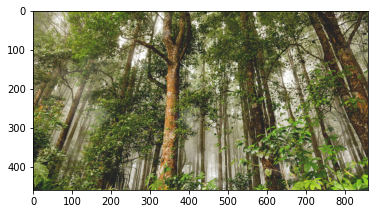

In [60]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/drive/MyDrive/project/Dataset/forest1.h5")
img=image.load_img('/content/drive/MyDrive/project/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg')
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [52]:
pred=model.predict(x)
pred

1/1 [==============================] - 0s 131ms/step


array([[1.]], dtype=float32)

In [58]:
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='ACb518f2b9e433f46f9d7125653c47fede'
  auth_token='ab2f53a296cadb2283eddcf7a8681752'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+12537858940',
      #to number
      to='+91 63695 36822')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')

No Fire
